# Pymaceuticals Inc. Analysis
---
* There are in total 10 types of drug regimens tested on mice in this study, with 9 treatments and 1 placebo. "Capomulin" was tested 230 times, being the drug regimen tested the highest number of times on mice comparing to all other drug regimens. Following by "Ramicane" tested 228 times, and "Ketapril" tested 188 times. 
* Out of all mice tested (after removing all data for the duplicate mouse), 49% were female and 51% were male.
* Looking at the distribution of the final tumor volume of each mouse across four of the treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), mice tested with "Ramicane" seem to have the lowest median final tumor volume. Mice tested with "Infubinol" have the highest median final tumor volume, slightly above the second highest median final tumor volume for mice tested with "Ceftamin".

### Capomulin
* Looking at the tumor volume change over time for the mouse (ID l509) treated with "Capomulin", the tumor volume increased steadily from days 0 to 20, then has a general downward trend for tumor volume from days 20 to 35 and a slight upward trend after day 35. 
* There is a fairly strong positive relationship existing between the average tumor volume and mouse weight for mice treated with "Capomulin" regimen (correlation coefficient between the two variables is 0.84). The marjority of points on the scatterplot lies fairly close to the line of best fit. 
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
len(combined_study_data["Mouse ID"].unique())

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = (combined_study_data[combined_study_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"]).unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_study_data[combined_study_data["Mouse ID"] == duplicate_mice[0]]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_study_data[combined_study_data["Mouse ID"] != duplicate_mice[0]]
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check the number of mice in the clean DataFrame.
len(clean_mice_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor = (clean_mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).mean()
median_tumor = (clean_mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).median()
var_tumor = (clean_mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).var()
std_tumor = (clean_mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).std()
sem_tumor = (clean_mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).sem()

# Store all aggregated series into a dictionary with keys being the column names and values being the calculated values
tumor_by_drug_dict = {"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                      "Tumor Volume Variance":var_tumor, "Tumor Volume Std. Dev.": std_tumor, 
                      "Tumor Volume Std. Err.":sem_tumor
                      }
                      
# Assemble the resulting series from the dictionary into a single summary DataFrame.                    
summary_stats = pd.DataFrame(tumor_by_drug_dict)

# Display the data table for preview
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use the aggregation method, produce the same summary statistics in a single line.
agg_summary = (clean_mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).aggregate(["mean", "median", "var", "std", "sem"])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

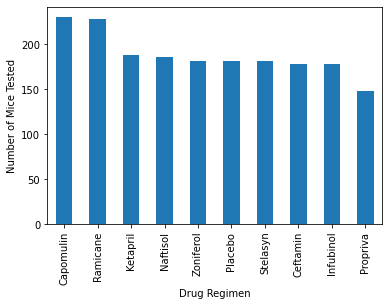

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepts_by_drugreg = (clean_mice_data.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending = False)
timepts_by_drugreg.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "Number of Mice Tested")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

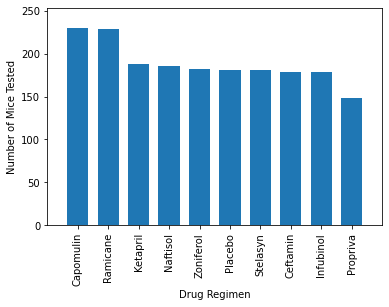

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = list(timepts_by_drugreg.index)
plt.bar(x_axis, timepts_by_drugreg, width = 0.7)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(timepts_by_drugreg) * 1.1)
plt.xticks(label = timepts_by_drugreg.index, rotation = "vertical")

<AxesSubplot:ylabel='Sex'>

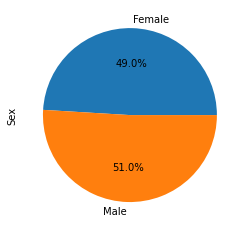

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = clean_mice_data.groupby(["Sex"])["Sex"].count()
mice_by_sex.plot(kind = "pie", autopct = "%.1f%%")

Text(0, 0.5, 'Sex')

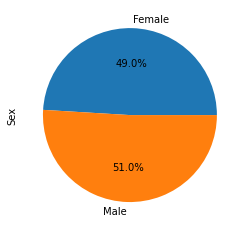

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_by_sex, labels = mice_by_sex.index, autopct = "%.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
get_max = clean_mice_data.groupby(clean_mice_data["Mouse ID"])["Timepoint"].max()

# Reset index
get_max = get_max.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_at_max = pd.merge(get_max, clean_mice_data, on = ["Mouse ID", "Timepoint"])
tumor_at_max

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
 
# Iterate through each drug in drugs
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_by_drug = tumor_at_max.loc[tumor_at_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Add subset 
    tumor_volumes.append(tumor_by_drug)
    
    # Calculate the IQR 
    quartiles = tumor_by_drug.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q

    # Determine lower and upper bounds 
    lower_bound = lower_q - (1.5 * iqr) 
    upper_bound = upper_q + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_by_drug.loc[(tumor_by_drug > upper_bound) | (tumor_by_drug < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

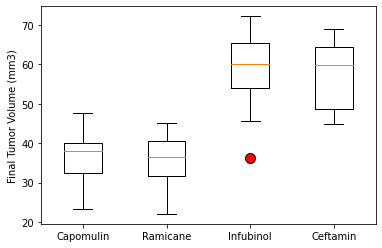

In [15]:
# Formatting
outlier_style = dict(markerfacecolor="red", marker='o', markersize = 10)

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels = drugs, flierprops = outlier_style)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment for l509')

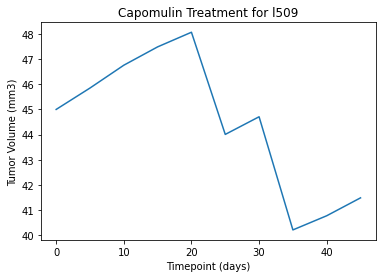

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
sliced_data = clean_mice_data[clean_mice_data["Drug Regimen"] == "Capomulin"]
the_mouse = sliced_data["Mouse ID"].unique()[21]
x_axis = sliced_data[sliced_data["Mouse ID"] == the_mouse]["Timepoint"]
y_axis = sliced_data[sliced_data["Mouse ID"] == the_mouse]["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment for {the_mouse}")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

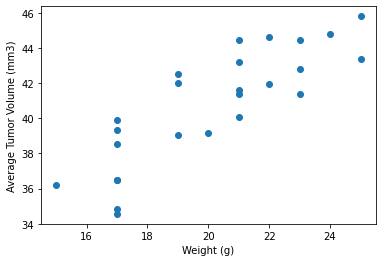

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = sliced_data.groupby(["Mouse ID"])["Weight (g)"].unique()
avg_tumor_volume = sliced_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Dependency for linear regression
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

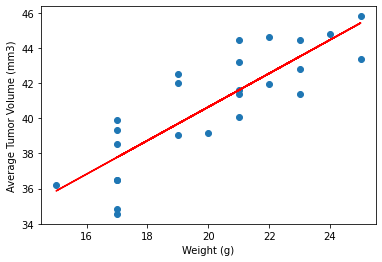

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
r = st.pearsonr(weight.astype(int), avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is{r[0]: .2f}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight.astype(int), avg_tumor_volume)
regress_values = weight * slope + intercept
line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
plt.plot(weight, regress_values, "r-")
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")